# Altitude de dernière saturation $z_{ls}$  

Pour chaque point de grille dans la moyenne troposphère (~5km) on cherche à quelle altitude est le plus proche nuage

<img src="lastsaturation.png" width="500" height="300">


## Importing data and libraries, read data

In [22]:
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
data1 = Dataset('SAMUW_rceiso_96km_30C_750m_3Dmphyfull.nc')
data2 = Dataset('SAMUW_rceiso_96km_30C_750m_m60hPad_3Dmphyfull.nc')
data3 = Dataset('SAMUW_rceiso_cyclone_3D.nc')
data4 = Dataset('SAMUW_rceiso_cyclone_m60hPad_3D.nc')
data5 = Dataset('SAMUW_rceiso_squall2_U10_H1000_2km_3D.nc')
data6 = Dataset('SAMUW_rceiso_squall2_U10_H1000_m60hPad_3D.nc')
print("data1:")
print(data1)
qc = data1.variables['QC'][:]
qi = data1.variables['QI'][:]
x = np.asarray(data1.variables['x'][:])
y = np.asarray(data1.variables['y'][:])
z = np.asarray(data1.variables['z'][:])
t = data1.variables['time'][:]
t = t - 50
qc2 = data2.variables['QC'][:]
qi2 = data2.variables['QI'][:]
x2 = np.asarray(data2.variables['x'][:])
y2 = np.asarray(data2.variables['y'][:])
z2 = np.asarray(data2.variables['z'][:])
t2 = data2.variables['time'][:]
t2 = t2 - 50
qc3 = data3.variables['QC'][:]
qi3 = data3.variables['QI'][:]
x3 = np.asarray(data3.variables['x'][:])
y3 = np.asarray(data3.variables['y'][:])
z3 = np.asarray(data3.variables['z'][:])
t3 = data3.variables['time'][:]
t3 = t3 - 50
qc3 = data3.variables['QC'][:]
qi3 = data3.variables['QI'][:]
x3 = np.asarray(data3.variables['x'][:])
y3 = np.asarray(data3.variables['y'][:])
z3 = np.asarray(data3.variables['z'][:])
t3 = data3.variables['time'][:]
t3 = t3 - 50
qc4 = data4.variables['QC'][:]
qi4 = data4.variables['QI'][:]
x4 = np.asarray(data4.variables['x'][:])
y4 = np.asarray(data4.variables['y'][:])
z4 = np.asarray(data4.variables['z'][:])
t4 = data4.variables['time'][:]
t4 = t4 - 50
qc5 = data5.variables['QC'][:]
qi5 = data5.variables['QI'][:]
x5 = np.asarray(data5.variables['x'][:])
y5 = np.asarray(data5.variables['y'][:])
z5 = np.asarray(data5.variables['z'][:])
t5 = data5.variables['time'][:]
t5 = t5 - 50
qc2 = data2.variables['QC'][:]
qi2 = data6.variables['QI'][:]
x6 = np.asarray(data6.variables['x'][:])
y6 = np.asarray(data6.variables['y'][:])
z6 = np.asarray(data6.variables['z'][:])
t6 = data6.variables['time'][:]
t6 = t6 - 50
print( "qc: ", data1.variables['QC'],
       "qi: ", data1.variables['QI'],
       "z: ", data1.variables['z'],    )

SyntaxError: invalid syntax (<ipython-input-22-ba2a6abea15f>, line 6)

## Find index of altitude 5km

In [2]:
i = 0
while z[i] <= max(z):
    if z[i] >= 5000:
        zparcel = z[i]
        izparcel = i
        break
    i+=1
print("index of zparcel: ", izparcel, ", zparcel = ", zparcel)

index of zparcel:  23 , zparcel =  5077.64


## 2D maps of cloud ice mixing ratio $q_i$ and cloud water mixing ratio $q_c$

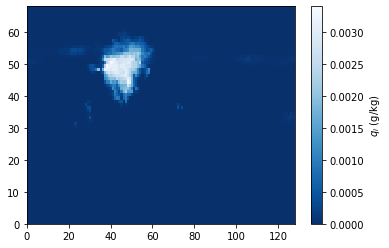

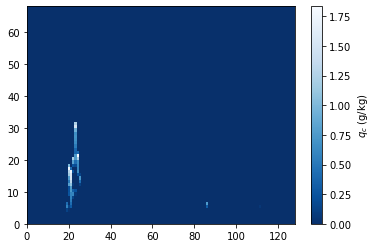

In [3]:
QImap = plt.pcolormesh(qi[0,:,:,izparcel], cmap="Blues_r")
cb = plt.colorbar(QImap)
cb.set_label("$q_i$ (g/kg)")
plt.show()
QCmap = plt.pcolormesh(qc[0,:,:,izparcel], cmap="Blues_r")
cb = plt.colorbar(QCmap)
cb.set_label("$q_c$ (g/kg)")
plt.show()

## First cloud above parcel detection (1D)

Presence of clouds is detected by the quantity $q_c + q_i$ reaching a threshold of $1\times10^{-6}$ g/kg. Above a particular coordinate (x,y), the closest cloud altitude $z_{cloud}$ can be detected as following:

In [4]:
zcloud = 0
thresh = 1e-6
k = izparcel
cond = qc[0,izparcel:,0,0]+qi[0,izparcel:,0,0]
if np.max(cond) - thresh >= 0:
    zcloud = z[np.min(np.where(cond-thresh>=0))] + zparcel
else:
    zcloud = np.max(z)
print("zcloud = ", zcloud)

zcloud =  8127.3604


## First cloud above parcel detection (2D)  
Using the same method, we now find all closest clouds along the $x$-axis

In [5]:
xclouds = np.zeros(len(x))
zclouds = np.zeros(len(x))
thresh = 1e-6
k = izparcel
for i in np.arange(len(x)):
    xclouds[i] = i
    cond = qc[0,izparcel:,0,i]+qi[0,izparcel:,0,i]
    if np.max(cond) - thresh >= 0:
        zclouds[i] = z[np.min(np.where(cond-thresh>=0))] + zparcel
    else:
        zclouds[i] = np.max(z)



### 2D plot result

Cloud base altitude is given along the $x$-axis . Parcel altitude is shown by the red line 

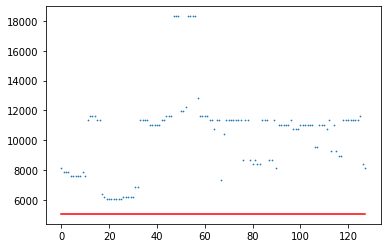

In [6]:
plt.plot(xclouds, np.ones((len(zclouds)))*zparcel, color="r")
plt.scatter(xclouds, zclouds, s=0.5)
plt.show()

## First cloud above parcel detection (3D)  


In [9]:
xclouds = np.zeros(len(x))
yclouds = np.zeros(len(y))
zclouds = np.zeros((len(x),len(y)))
thresh = 1e-6
k = izparcel
for i in np.arange(len(x)):
    for j in np.arange(len(y)):
        xclouds[i] = x[i]
        yclouds[j] = y[j]
        cond = qc[0,izparcel:,j,i]+qi[0,izparcel:,j,i]
        if np.max(cond) - thresh >= 0:
            zclouds[i,j] = z[np.min(np.where(cond-thresh>=0))] + zparcel
        else:
            zclouds[i,j] = np.max(z)

### Plot of the result

$z_{clouds}$ is the altitude in meters above the tropospheric parcel ($z_{parcel} \approx$ 5000 m) at which the first cloud is encountered. Following the 2D approach, values of $z = z_{max} \approx$ 18 000 m are given to grid points with no cloud cover.  
Therefore white regions show cloud cover close to the troposphere while blue regions show higher or no cloud cover. 

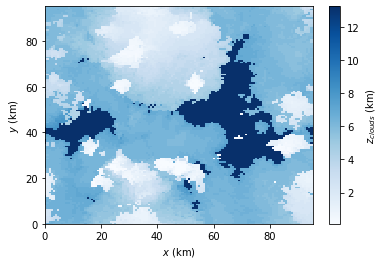

In [21]:
Cloudmap = plt.pcolormesh(xclouds/1000, yclouds/1000, (zclouds-zparcel)/1000, cmap="Blues")
plt.xlabel("$x$ (km)")
plt.ylabel("$y$ (km)")
cb = plt.colorbar(Cloudmap)
cb.set_label('$z_{clouds}$ (km)')
plt.savefig("3Dclouds.eps", format="EPS", dpi=600)
plt.show()